<a href="https://colab.research.google.com/github/nicol2020/UV-SINTEC/blob/master/310lamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3D MODEL OF 9 TILES OF 310, RED, BLUE AND IR LIGHT
-the code was used for making a 3d model of 9tiles, 
- the table below was used for second section of the code, the section which requests from user to write power density in W/m^2 at given height:

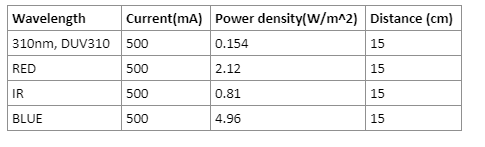



- the user needs to change the distance, size of the plane, half angle, 
LEDs positions, radius 
 - for now, the  code is calculating uniformity for 2 circle of LEDs. commet out the lines if you work with only one circle of LEDs. 
 - the code is for individual LEDs. 
 - need some upgrading in order to calculate irradiance of 9 tiles of N - number LEDs over the plane. 

In [548]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [549]:
#Ben's code
#Only use code in this cell if given the power density at a given height and need to find the initial intensity I [cd]

I_zero = 2.12 #Power Density in w/m^2 at a given height h from the LED
h = 0.15 #height from the LED to the plane given for Power density
I = I_zero*(h**2) #Intensity value in cd



In [550]:
#Ben's code
z = 0.30 #Distance from LED plane to target plane in metres


#Comment out the next 3 lines and uncomment the line after that in order to use a given I value in cd
#omega = 2*np.pi #solid Angle
#fi = 1 #Flux in watts
#I = fi/omega
#I = 0.0000154 #Initial intensity in cd

hA = 60 #LED half angle in degrees,,,,,,,,,,,, 63deg half angle is written in LED's datasheet 

#uniformity over 30cm*30cm plane
px = 0.30 #size of plane in x direction (m)
py = 0.30 #size of plane in y direction (m)
num = 300 #Number of points desired in each direction on the plane

In [551]:
f = 60/hA #Variable to adjust theta for different half angles

X = np.outer(1,np.linspace(-px/2,px/2,num)) #Position on plane in x direction
np.round(X,4)                         
Y = np.outer(np.linspace(-py/2,py/2,num),1) #Position on plane in y direction
np.round(Y,4)

x, y = np.meshgrid(X,Y) #This is required to enable the contour plot

E = 0 #Set total illuminance to 0 initially
Enew = 0 #Set storage variable to zero initially to 0 initially

In [552]:
# uncommet lines below if you work with circle configuration, 

LED_n = 9 # number of clusters 
radius = 0.20 # radius in m
angle = 360/LED_n # get angle of each section

xlist = [] # list for x coordinates
ylist = [] # list for y coordinates


#get x,y LEDs positions
angle1 = angle
for i in range(LED_n):
  print(angle1)
  xx =  -0.0085+(radius*np.cos(np.radians(angle1))) # x coordinates
  yy =  -0.006+(radius*np.sin(np.radians(angle1))) # y coordinates
  xlist.append(np.round(xx, 4)) # round to 4 decimal and save to list
  ylist.append(np.round(yy ,4)) # round to 4 decimal and save to list
  angle1 = angle1 + angle


xlist_2 = [] # adding a seconde circle of LED
ylist_2 = [] # adding a seconde cirle of LED
angle2 = angle
for i in range(LED_n):
  print(angle2)
  xx =  -0.0085+(radius*np.cos(np.radians(angle2))) # x coordinates
  yy =  0.006+(radius*np.sin(np.radians(angle2))) # y coordinates
  xlist_2.append(np.round(xx, 4)) # round to 4 decimal and save to list
  ylist_2.append(np.round(yy ,4)) # round to 4 decimal and save to list
  angle2 = angle2 + angle
print(xlist_2)
print(ylist_2)

xlist.extend(xlist_2)
ylist.extend(ylist_2)  

print(f"x coordinates [X1, X2, X3, X4 ...]={xlist} ")
print(f"y coordinates [Y1, Y2, Y3, Y4 ...]= {ylist}")



40.0
80.0
120.0
160.0
200.0
240.0
280.0
320.0
360.0
40.0
80.0
120.0
160.0
200.0
240.0
280.0
320.0
360.0
[0.1447, 0.0262, -0.1085, -0.1964, -0.1964, -0.1085, 0.0262, 0.1447, 0.1915]
[0.1346, 0.203, 0.1792, 0.0744, -0.0624, -0.1672, -0.191, -0.1226, 0.006]
x coordinates [X1, X2, X3, X4 ...]=[0.1447, 0.0262, -0.1085, -0.1964, -0.1964, -0.1085, 0.0262, 0.1447, 0.1915, 0.1447, 0.0262, -0.1085, -0.1964, -0.1964, -0.1085, 0.0262, 0.1447, 0.1915] 
y coordinates [Y1, Y2, Y3, Y4 ...]= [0.1226, 0.191, 0.1672, 0.0624, -0.0744, -0.1792, -0.203, -0.1346, -0.006, 0.1346, 0.203, 0.1792, 0.0744, -0.0624, -0.1672, -0.191, -0.1226, 0.006]


In [553]:
"""
############################## my part,  LEDs positions calculatations #####################
#LEDs array coordinates
"""
#LEDs Coordinates of one 325 tile: (0,0), (-8.5mm, 6mm), (8.5mm, 6mm), (8.5mm,- 6mm),(-8.5mm, -6mm) 
"""

#saving LEDs positions to xlist and ylist for calculation
# 
#xlist = [0, 0.0085, 0.0085, -0.0085, -0.0085 ]
#ylist = [0, 0.006, -0.006, 0.006, -0.006]

xlist = [0]
ylist = [0]



# LEDs coordinates centered at (0,0)
#empty lists for saving LEDs coordinates
xlist_11 = [] # x coordinates for 1 unit
xlist_22 = [] # x coordinates for 2 unit
xlist_33 = [] # x coordinates for 3 unit
xlist_44 = [] # x coordinates for 4 unit
xlist_55 = [] # x coordinates for 5 unit
xlist_66 = [] # x coordinates for 6 unit
xlist_77 = [] # x coordinates for 7 unit
xlist_88 = [] # x coordinates for 8 unit
xlist_89 = []
ylist_11 = [] # y coordinates for 1 unit
ylist_22 = [] # y coordinates for 2 unit
ylist_33 = [] # y coordinates for 3 unit
ylist_44 = [] # y coordinates for 4 unit
ylist_55 = [] # y coordinates for 5 unit
ylist_66 = [] # y coordinates for 6 unit
ylist_77 = [] # y coordinates for 7 unit
ylist_88 = [] # y coordinates for 8 unit
ylist_89 = []

#below 
a= 0.12
b= 0.12
c = 0.12
for i in range(len(xlist)):
  xlist_11.append(xlist[i]+c)
  ylist_11.append(ylist[i]+a)

  xlist_22.append(xlist[i])
  ylist_22.append(ylist[i]+a)

  xlist_33.append(xlist[i]-c)
  ylist_33.append(ylist[i]+a)

  xlist_44.append(xlist[i]+b)
  ylist_44.append(ylist[i])

  xlist_55.append(xlist[i]-b)
  ylist_55.append(ylist[i])

  xlist_66.append(xlist[i]+c)
  ylist_66.append(ylist[i]-a)

  xlist_77.append(xlist[i])
  ylist_77.append(ylist[i]-a)

  xlist_88.append(xlist[i]-c)
  ylist_88.append(ylist[i]-a)

 
# save LEDs list to one list  which would be used for futher calculation
xlist.extend(xlist_11)
ylist.extend(ylist_11)

xlist.extend(xlist_22)
ylist.extend(ylist_22)

xlist.extend(xlist_44)
ylist.extend(ylist_44)

xlist.extend(xlist_33)
ylist.extend(ylist_33)

xlist.extend(xlist_55)
ylist.extend(ylist_55)

xlist.extend(xlist_66)
ylist.extend(ylist_66)

xlist.extend(xlist_77)
ylist.extend(ylist_77)

xlist.extend(xlist_88)
ylist.extend(ylist_88)


# deleting the (0,0) LED from list, commet this two lines if you work with LED positioned at (0, 0)
#del xlist[0]
#del ylist[0]

#printing the LEDs positions, just for checking is every positions calulated correctly
print(xlist)
print(ylist)

"""

'\n\n#saving LEDs positions to xlist and ylist for calculation\n# \n#xlist = [0, 0.0085, 0.0085, -0.0085, -0.0085 ]\n#ylist = [0, 0.006, -0.006, 0.006, -0.006]\n\nxlist = [0]\nylist = [0]\n\n\n\n# LEDs coordinates centered at (0,0)\n#empty lists for saving LEDs coordinates\nxlist_11 = [] # x coordinates for 1 unit\nxlist_22 = [] # x coordinates for 2 unit\nxlist_33 = [] # x coordinates for 3 unit\nxlist_44 = [] # x coordinates for 4 unit\nxlist_55 = [] # x coordinates for 5 unit\nxlist_66 = [] # x coordinates for 6 unit\nxlist_77 = [] # x coordinates for 7 unit\nxlist_88 = [] # x coordinates for 8 unit\nxlist_89 = []\nylist_11 = [] # y coordinates for 1 unit\nylist_22 = [] # y coordinates for 2 unit\nylist_33 = [] # y coordinates for 3 unit\nylist_44 = [] # y coordinates for 4 unit\nylist_55 = [] # y coordinates for 5 unit\nylist_66 = [] # y coordinates for 6 unit\nylist_77 = [] # y coordinates for 7 unit\nylist_88 = [] # y coordinates for 8 unit\nylist_89 = []\n\n#below \na= 0.12\nb= 

In [554]:
#########################################
#Ben's code for calculating the E over the plane
#I made a little change,using one for loop  instade of 2 for loops ,but does the same job

for ledx,ledy in zip(xlist,ylist): #Outer loop to change the y position of the leds for each row of x positions
    Enew = E #Store the total illuminance from previous iteration
    opp = np.sqrt((x-ledx)**2+(y-ledy)**2) #Calculating the parallel distance from the LED to the point on the plane
    hyp = z**2 + opp**2 #Calculating the straight line distance from the LED to the point on the plane
    theta = np.degrees(np.arctan(opp/z)) #Calculating the angle from the LED to each position on the plane
    thetaA = f*theta #Converting theta to relevant value with respect to LED half angle
    thetaA[thetaA > 90] = 90 #Set all values for thetaA > 90 to 90 so there is no negative illuminance values

    En = (np.cos(np.radians(thetaA))*I)/hyp #Calculating illuminance of each LED for each point on the plane in W/m^2
    E = En + Enew #Adding illuminance from current iteration to total


M = np.max(E) #Peak of the matrix E
print(f"max E in the target plane: {M} ")
#E = E/M #Creating relative illuminance with respect to the peak of E

max E in the target plane: 5.494778332324239 


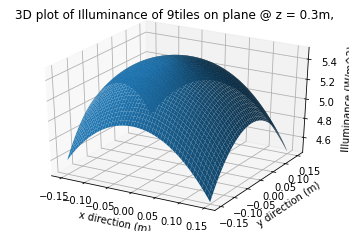

In [555]:
#Ben's code, changed only the set_title
#Code to create a 3D plot of 2D position on the plane and total illuminance
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(x,y,E)
ax.set_title(f"3D plot of Illuminance of 9tiles on plane @ z = {z}m,")
ax.set_xlabel("x direction (m)")
ax.set_ylabel("y direction (m)")
ax.set_zlabel("Illuminance (W/m^2)")
#plt.plot(ledx,ledy,'rx')
#plt.contour(x,y,E)
#plt.colorbar(Mappable)
plt.show()

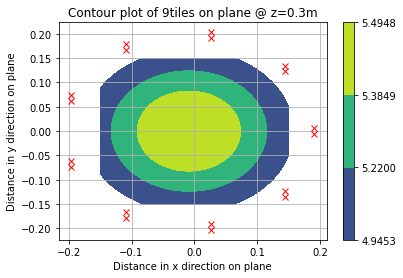

In [556]:
#Ben's code

fig,ax = plt.subplots(1,1)
#V = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1] #Line for putting specific contour lines in the plot
#V = [0.9, 0.93, 0.95, 0.98, 1]
V = [0.90*M,0.95*M, 0.98*M, M] #Array for making specific contour lines for illuminance in W/m^2
cp = ax.contourf(x,y,E,V)
#Code below for plotting each LED's position
"""
for j in ylist:
    ledy = -(n-j)*d/2 +py/2 
    for i in xlist:
        ledx = -(n-i)*d/2 +px/2
        plt.plot(ledx,ledy,'rx')
"""
for ledx, ledy in zip(xlist,ylist):
  plt.plot(ledx,ledy,'rx')


fig.colorbar(cp)
plt.title(f"Contour plot of 9tiles on plane @ z={z}m")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()